<a href="https://colab.research.google.com/github/JorgeOrsi/Regress-o-Linear-/blob/main/M%C3%A9todo_de_regress%C3%A3o_Linear_Exemplo_com_100_pontos_criados_aleat%C3%B3riamente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Primeiro Vamos introduzir uma variável aleatória, uma variavel categórica binária e um erro associado aos nossos dados 
%matplotlib inline
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np

x = sp.random.normal(size=100)

categoria = sp.random.binomial(n=1, p=.5, size=100)
erro = sp.random.normal(size=100)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Função de exemplo para plotar 100 pontos aleatórios para servir de exemplo ao método
y = 3 + 2*x  + 1.5*categoria + erro

In [3]:
dic = {"y":y, "x":x, "categoria":categoria}
dados = pd.DataFrame(data=dic)
dados  
 #Visualiza o DataFrame

,y,x,categoria
0,6.498145,1.653734,0
1,10.587496,2.428272,0
2,5.056642,0.110804,0
3,5.772945,0.137706,1
4,9.871320,2.147891,1
...,...,...,...
95,0.325104,-0.985948,0
96,0.725938,-2.020172,1
97,2.185324,-1.056144,0
98,2.361133,-1.104680,1


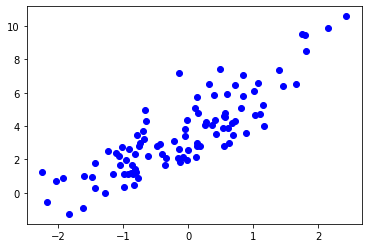

In [4]:
#Gráfico dos pontos gerados aleatóriamente
plt.plot(x,y,"bo")

In [5]:
#Definindo a função fi(x) e os coeficientes alpha
def g1(x):
    return x
def g2(x):
    return 1


gx = [g1,g2]
alpha = [1,1]

def q(x,gx,alpha):
    q=0
    for g, a in zip(gx, alpha):
        q += g(x)*a
    return (q)


In [6]:
#Definindo nossa matriz 
k = len (gx)
m = np.size(x)

A = np.zeros([k,k])
b = np.zeros([k])


for i in range(k):
    for n in range(m): 
         b[i] += y[n]*gx[i](x[n])
    for j in range(k):
         for n in range(m):
                A[i,j] += gx[i](x[n])*gx[j](x[n])

In [7]:
print (A,b)

[[ 99.36740019 -10.69861416]
 [-10.69861416 100.        ]] [164.99412778 349.28490435]


In [8]:
coef = np.linalg.solve(A,b)
print("coef = ",coef)

coef =  [2.06024242 3.71326643]


In [9]:
alpha = coef

print(alpha)

y_cal= q(x,gx,alpha)

[2.06024242 3.71326643]


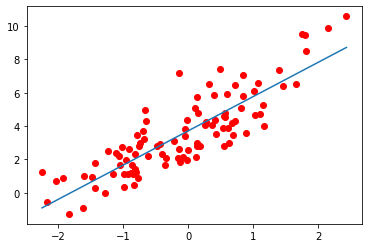

In [10]:
x_min = np.min(x)
x_max = np.max(x)
xx = np.linspace(x_min,x_max,1000)
y_cal = q(xx,gx,alpha)
plt.plot(x,y,"ro")
plt.plot(xx,y_cal)